In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Load Dataset

In [16]:
df=pd.read_csv("c:/project/spotify.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head(2)

data cleaning

In [22]:
df.isna().sum()
df.shape

(2017, 16)

In [25]:
df.columns
len(df.columns)
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


Data Analysis

### Top 5 Popular Artits

In [29]:
top_five_artits=df.groupby("artist").count().sort_values(by="song_title",ascending=False)["song_title"][:5]
top_five_artits

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

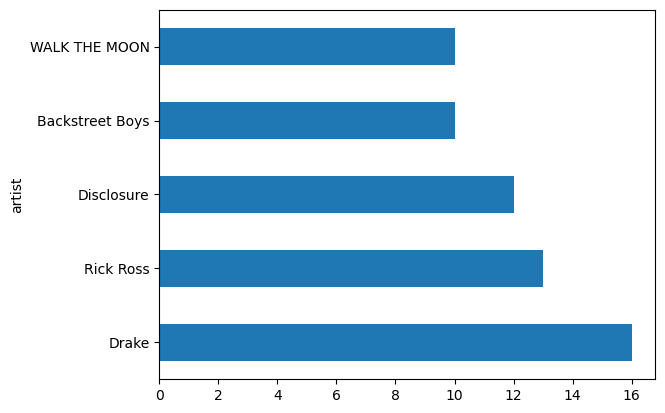

In [32]:
top_five_artits.plot.barh()
plt.show()

### Top 5 loudest Tracks

In [45]:
top_five_loudest_tracks=df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


Text(0.5, 1.0, 'Top 5 Loudest Tracks')

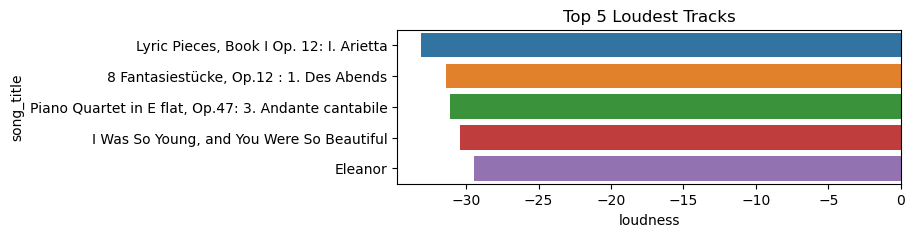

In [46]:
plt.figure(figsize=(6.5,2))
sns.barplot(x="loudness",y="song_title",data=top_five_loudest_tracks)
plt.title("Top 5 Loudest Tracks")

### Artist with the most danceabilty songs

In [49]:
top_five_Artist_danceable_song=df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_five_Artist_danceable_song

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


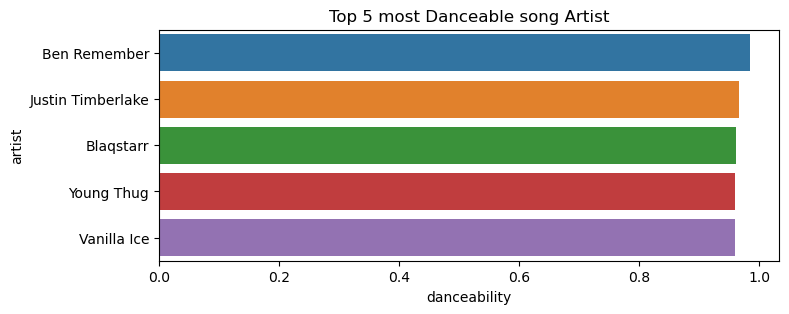

In [53]:
plt.figure(figsize=(8,3))
sns.barplot(x="danceability",y="artist",data=top_five_Artist_danceable_song)
plt.title("Top 5 most Danceable song Artist")
plt.show()

### Top 10 instrumentalness Tracks

In [54]:
df.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino


In [75]:
top_5_instrumentalness_tracks=df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:5]
top_5_instrumentalness_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


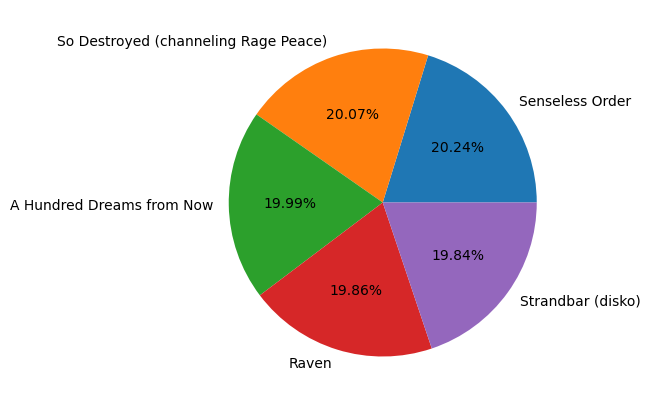

In [79]:
plt.figure(figsize=(12,5))
plt.pie(x="instrumentalness",data=top_5_instrumentalness_tracks,autopct="%1.2f%%",labels=top_5_instrumentalness_tracks.song_title)
plt.show()

### multiple feature plot

In [80]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [83]:
intrested_feature_column=['tempo','loudness','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence']

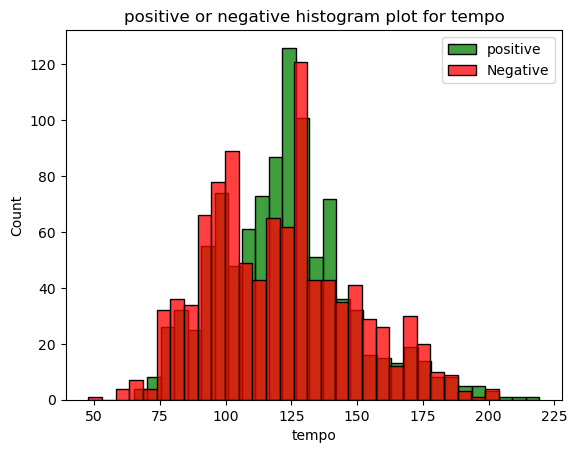

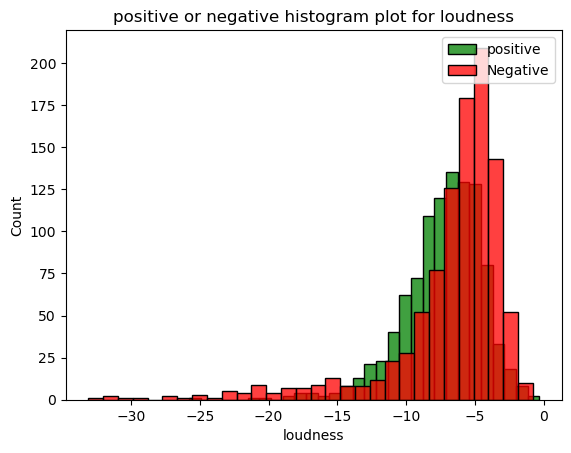

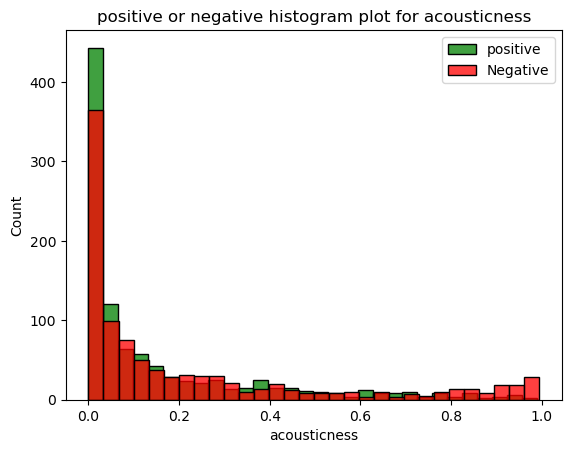

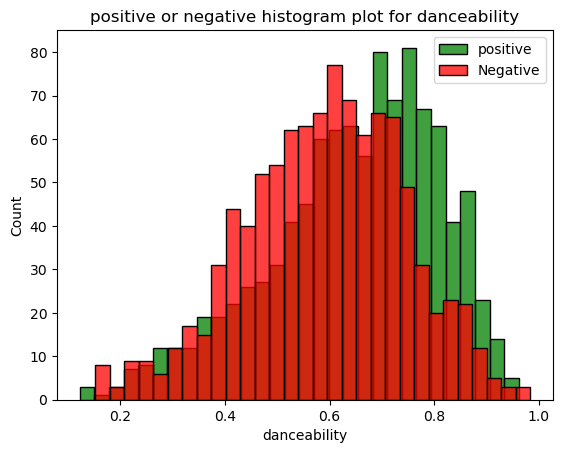

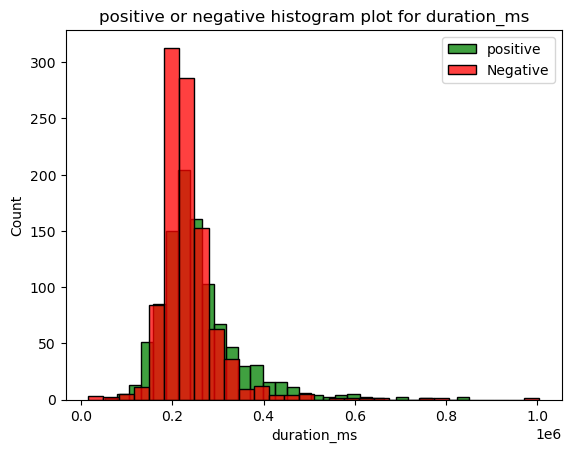

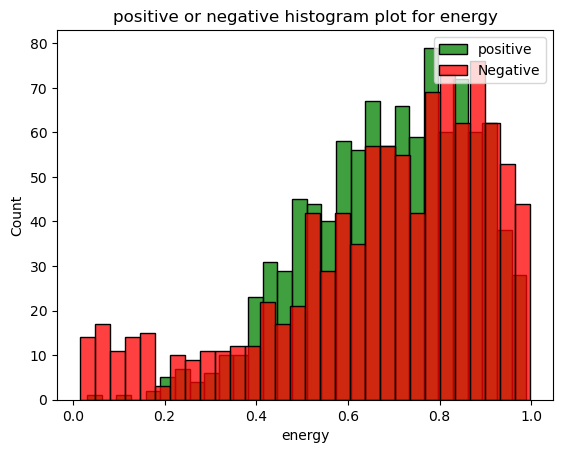

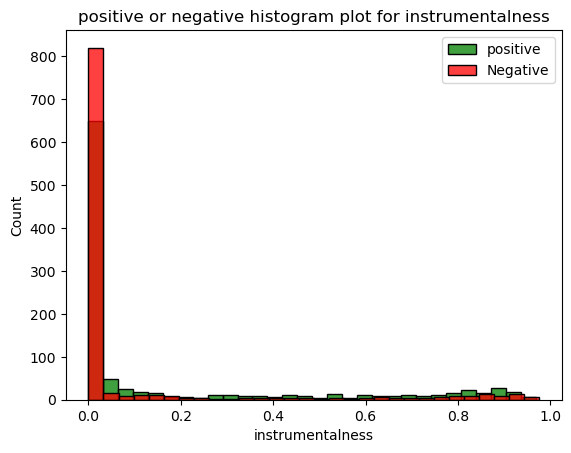

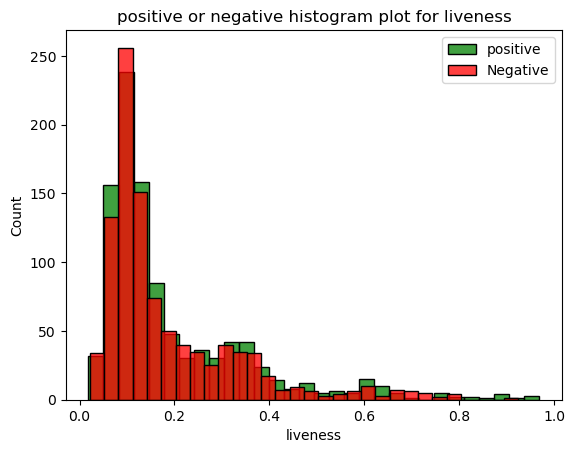

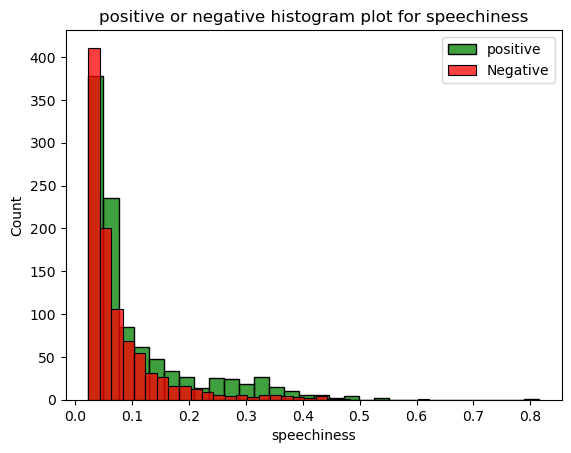

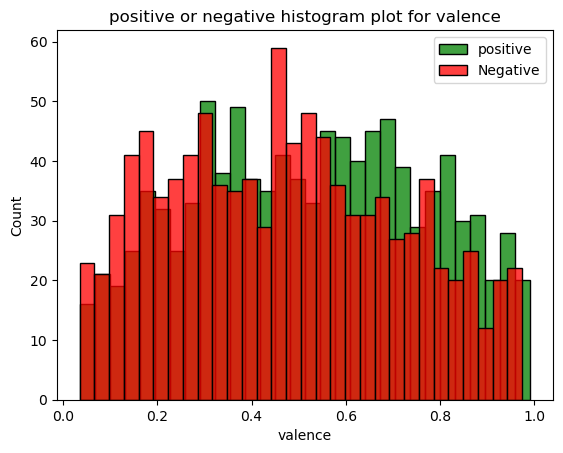

In [89]:
for feature_col in intrested_feature_column:
    pos_data=df[df["target"]==1][feature_col]
    neg_data=df[df["target"]==0][feature_col]
    sns.histplot(pos_data,bins=30,label="positive",color="green")
    sns.histplot(neg_data,bins=30,label="Negative",color="red")
    plt.legend(loc="upper right")
    plt.title(f"positive or negative histogram plot for {feature_col}")
    plt.show()
    
    